In [2]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:blue;overflow:hidden;font-weight:800">Highest Grossing Films</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/highest-grossing-films-from-1915/high_grossing_films_by_year.csv


## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**It is raw data scraped from Wikipedia about the highest-grossing films (hit movies/ box-office hits) over a century. beautifulSoup was used to scrape the data. Preprocess according to your requirements. You are free to manipulate it.**

## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>3  |  Download dataset</div></b>

In [3]:
'''# Download
df = pd.read_csv('/kaggle/input/highest-grossing-films-from-1915/high_grossing_films_by_year.csv')'''
df = pd.DataFrame()
path = 'films/labels'
for file in tqdm(os.listdir(path)):
    if os.path.isfile(f'{path}/{file}'):
        data = np.loadtxt(f'{path}/{file}')
        if data.shape[-1] != 5 or (data >= 6).sum():
            continue
        data = data.reshape((-1, 5))
        data = pd.DataFrame({'movie_img':[file[:-3] + 'jpg'],'cost': [data[:, 0].astype(np.int64)], 'data': [data[:, 1:]]})
        df = pd.concat([df, data])

## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>4  |  Inspect and Cleaning the Dataset</div></b>

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 


,Year,Title,Worldwide Gross,Budget
0,1915,The Birth of a Nation,"$50,000,000–100,000,000$20,000,000+R($5,200,000)R","$110,000"
1,1916,Intolerance,"$1,750,000RIN","$385,907"
2,1917,Cleopatra,"$500,000*R","$300,000"
3,1918,Mickey,"$8,000,000","$250,000"
4,1919,The Miracle Man,"$3,000,000R","$120,000"


In [5]:
# Dataframe df summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (150, 4)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Year,int64,0,0.0,0,110,150,1915.0,2024.0,1965.286667,29.216465,1915,1916,1917
Title,object,0,0.0,0,148,150,NaN,NaN,NaN,NaN,The Birth of a Nation,Intolerance,Cleopatra
Worldwide Gross,object,0,0.0,0,144,150,NaN,NaN,NaN,NaN,"$50,000,000–100,000,000$20,000,000+R($5,200,000)R","$1,750,000RIN","$500,000*R"
Budget,object,0,0.0,0,129,150,NaN,NaN,NaN,NaN,"$110,000","$385,907","$300,000"


<div class="alert alert-block alert-info" style="background-color:#b0c4de;color:#065535;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Columns "Worldwide Gross" and "Budget" do not show uniformity in the data, so I will clean the data and use the first value that appears in each line.</div>

In [6]:
# Budget
df['Budget'].unique()

array(['$110,000', '$385,907', '$300,000', '$250,000', '$120,000',
       '$800,000', '$600,000–800,000', '$930,042.78', '$700,000',
       '$382,000', '$3,967,000', '$150,000', '$2,000,000', '$388,000',
       '$379,000', '$600,000', '$1,250,000', '$1,607,351', '$694,065',
       '$672,255.75', '$200,000', '$1,116,000', '$274,076', '$1,605,000',
       '$325,000', '$1,905,000', '$1,300,000', '$1,488,423', '$1,200,000',
       '$3,900,000–4,250,000', '$2,600,000', '$2,100,000', '$1,600,000',
       '$1,700,000–2,000,000', '$1,344,000', '$2,681,298', '$1,400,000',
       '$1,000,000', '$65,000', '$2,125,000', '$5,255,000', '$6,375,000',
       '$4,200,000', '$2,500,000', '£505,581(~$2,000,000)', '$3,800,000',
       '$3,097,563', '$2,200,000', '$2,258,000', '$7,623,000',
       '$3,873,946', '$3,000,000–4,000,000', '$4,100,000',
       '$4,500,000–9,000,000', '$4,000,000', '$2,400,000', '$13,270,000',
       '$2,840,000', '$5,610,000', '$15,900,000', '$10,284,014',
       '$3,600,000–4,

In [7]:
# Cleaning and standardizing the "Budget" column
bud_0 = df["Budget"].str.split("–", n = 1, expand = True)
bud_1 = bud_0[0].str.split("(", n = 1, expand = True)

bud_1[0] = bud_1[0].str.replace('£','')
bud_1[0] = bud_1[0].str.replace('TBD','0')
bud_1[0] = bud_1[0].str.replace('HP8','')
bud_1[0] = bud_1[0].str.replace('$','')
bud_1[0] = bud_1[0].str.replace(',','')

bud_1[0] = bud_1[0].astype(float)
bud_1.head()


bud_1.head()

,0,1
0,110000.0,None
1,385907.0,None
2,300000.0,None
3,250000.0,None
4,120000.0,None


In [8]:
# Deleting the original "Budget" column and adding the already cleaned column.
df.drop(columns =["Budget"], inplace = True)
df["Budget"]= bud_1[0]

In [9]:
# Delete row with Budget = 0
index_names = df[ df['Budget'] == 0 ].index
  
# drop these row index from dataframe
df.drop(index_names, inplace = True)

In [10]:
# Worldwide Gross
df['Worldwide Gross'].unique()

array(['$50,000,000–100,000,000$20,000,000+R($5,200,000)R',
       '$1,750,000RIN', '$500,000*R', '$8,000,000', '$3,000,000R',
       '$5,000,000R($4,000,000)R', '$2,500,000R', '$5,000,000R',
       '$18,000,000–22,000,000R($6,131,000)R',
       '$10,738,000R($9,386,000)R', '$2,600,000RFH', '$3,600,000R',
       '$5,900,000R', '$4,400,000–4,800,000R', '$3,500,000*RSS',
       '$12,000,000R($1,400,000)R', '$2,738,993R',
       '$5,347,000R($1,856,000)R', '$3,250,000+R',
       '$3,000,000–4,000,000R', '$3,000,000+R', '$2,608,000R',
       '$2,500,000RON', '$4,460,000R', '$6,044,000+R($5,273,000)R',
       '$418,000,000+S7($8,500,000)R',
       '$390,525,192–402,352,579($32,000,000)RGW',
       '$87,000,862*($3,500,000)R', '$4,600,000*R', '$7,800,000R',
       '$267,997,843($3,449,353)R', '$8,878,000R', '$11,000,000R',
       '$9,555,586.44*R', '$6,500,000*R', '$80,000,000MD/$22,000,000R',
       '$11,200,000R', '$65,000,000*($3,300,000)R', '$14,750,000R',
       '$10,000,000*R', '$8,000

In [11]:
# Cleaning and standardizing the "Worldwide Gross" column

new_0 = df["Worldwide Gross"].str.split(" ", n = 1, expand = True)
new_1 = new_0[0].str.split("–", n = 1, expand = True)
new_2 = new_1[0].str.split("R", n = 1, expand = True)
new_3 = new_2[0].str.split("(", n = 1, expand = True)
new_4 = new_3[0].str.split("*", n = 1, expand = True)
new_5 = new_4[0].str.split("+", n = 1, expand = True)
new_6 = new_5[0].str.split("/", n = 1, expand = True)
new_6[0] = new_6[0].str.replace('CI','')
new_6[0] = new_6[0].str.replace('MD','')
new_6[0] = new_6[0].str.replace('HP1','')
new_6[0] = new_6[0].str.replace('$','')
new_6[0] = new_6[0].str.replace(',','')

new_6[0] = new_6[0].astype(float)
new_6.head()

,0,1
0,50000000.0,None
1,1750000.0,None
2,500000.0,None
3,8000000.0,None
4,3000000.0,None


In [12]:
# Deleting the original "Worldwide Gross" column and adding the already cleaned column.

df.drop(columns =["Worldwide Gross"], inplace = True)
df["Worldwide Gross"]= new_6[0] 

In [13]:
df.head()

,Year,Title,Budget,Worldwide Gross
0,1915,The Birth of a Nation,110000.0,50000000.0
1,1916,Intolerance,385907.0,1750000.0
2,1917,Cleopatra,300000.0,500000.0
3,1918,Mickey,250000.0,8000000.0
4,1919,The Miracle Man,120000.0,3000000.0


In [14]:
# Numerical features

print('### Numerical features ###','\n')
df.describe()

### Numerical features ### 


,Year,Budget,Worldwide Gross
count,149.000000,1.490000e+02,1.490000e+02
mean,1964.892617,4.253655e+07,3.717205e+08
std,28.912295,7.999255e+07,5.814976e+08
min,1915.000000,6.500000e+04,5.000000e+05
25%,1943.000000,1.605000e+06,1.000000e+07
50%,1962.000000,5.500000e+06,8.000000e+07
75%,1987.000000,2.800000e+07,4.772206e+08
max,2023.000000,3.560000e+08,2.923706e+09


In [15]:
# Categorical features

print('### Categorical features ###','\n')
df.describe(include=['O'])

### Categorical features ### 


,Title
count,149
unique,147
top,Ben-Hur
freq,2


In [16]:
# Adding column "Count" with constant value = 1

df['Count'] = pd.Series([1 for x in range(len(df.index))])

In [17]:
# Add the 'Profit' column.
df['Profit'] = df['Worldwide Gross'] - df['Budget']

In [18]:
# Add the Percentagem of Profit (%_Profit) column.
df['%_Profit'] = ((df['Worldwide Gross'] - df['Budget']) / df['Budget'] * 100).round(2)

In [19]:
df.head()

,Year,Title,Budget,Worldwide Gross,Count,Profit,%_Profit
0,1915,The Birth of a Nation,110000.0,50000000.0,1,49890000.0,45354.55
1,1916,Intolerance,385907.0,1750000.0,1,1364093.0,353.48
2,1917,Cleopatra,300000.0,500000.0,1,200000.0,66.67
3,1918,Mickey,250000.0,8000000.0,1,7750000.0,3100.00
4,1919,The Miracle Man,120000.0,3000000.0,1,2880000.0,2400.00


## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>5  |  EDA - Exploratory Data Analysis</div></b>

                               image_path  width  height  \
0                        films\barbie.jpg   2048    1152   
1  films\d5c7jxd9tdyqhyd85ycw5ab1wa09.jpg   7500    4219   

                                               image  
0  <PIL.WebPImagePlugin.WebPImageFile image mode=...  
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  


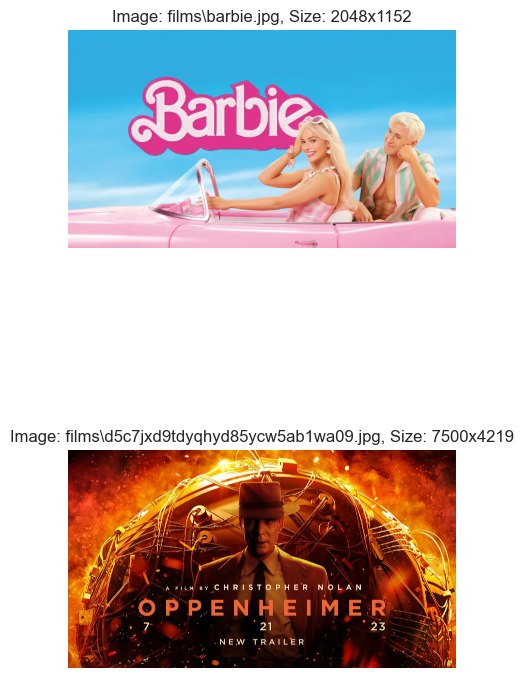

In [4]:
folder_path = 'films'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
images_info = []

for image_filename in image_files:
    image_path = os.path.join(folder_path, image_filename)
    image = Image.open(image_path)
    width, height = image.size
    if width != 640 or height != 640:
        images_info.append({'image_path': image_path, 'width': width, 'height': height, 'image': image})

df_images_info = pd.DataFrame(images_info)
fig, axs = plt.subplots(2, 1, figsize=(5, 10))

for i in range(2):
    image = df_images_info.iloc[i]['image']
    image_path = df_images_info.iloc[i]['image_path']
    width = df_images_info.iloc[i]['width']
    height = df_images_info.iloc[i]['height']
    axs[i].imshow(image)
    axs[i].set_title(f'Image: {image_path}, Size: {width}x{height}')
    axs[i].axis('off')
print(df_images_info)
plt.show()

In [ ]:
images_to_remove = ['films\barbie.jpg', 'films\d5c7jxd9tdyqhyd85ycw5ab1wa09.jpg']
result_df = df[~df['movies_paths'].isin(images_to_remove)]

In [20]:
# Distribution by Year of publication

import plotly.express as px

df_year = df.sort_values(by='Year', ascending=True)

# Create a bar chart
fig = px.bar(
    df_year,
    x='Year', y = 'Count',
    title='Distribution by Year',
    orientation='v',  # Vertical bar chart
    width=800, height=500)

# Customize the layout
fig.update_layout(margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="lightgreen",
    xaxis_title='Year',
    yaxis_title='Count',
)

# Show the plot
fig.show()

In [21]:
cols = ['Budget','Worldwide Gross', 'Profit', '%_Profit']

In [22]:
# Highest "cols" according to Count

for i in cols:
    
    if i == 'Budget':

        char_bar = df.groupby(['Title'])[['Budget']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Budget"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Title'], y=top["Budget"]))

        fig.update_layout(title="Top 10 Title According to " + 'Budget',
                          xaxis_title='Title',
                          yaxis_title= "Budget",
                          plot_bgcolor='#daf9fe', 
                          paper_bgcolor='#daf9fe',  
                          font=dict(color='blue'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby(['Title'])[[i]].mean().reset_index()
        char_bar = char_bar.sort_values(by=(i), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Title'], y=top[i]))

        fig.update_layout(title="Top 10 Title According to " + i,
                          xaxis_title='Title',
                          yaxis_title= i,
                          plot_bgcolor='#daf9fe', 
                          paper_bgcolor='#daf9fe',  
                          font=dict(color='blue'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

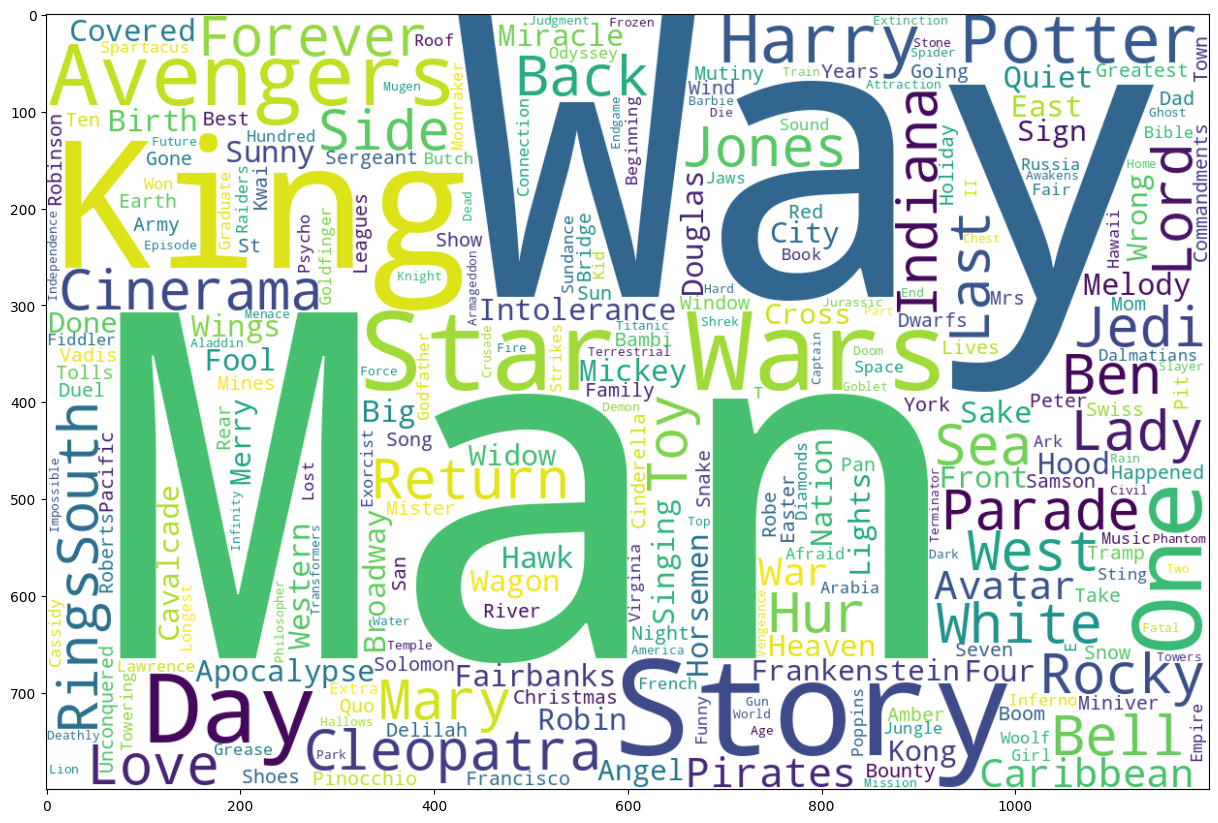

In [23]:
# WordCloud - Title

from wordcloud import WordCloud

world = df.Title[df.Title.index]

plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800, background_color='white').generate(" ".join(world))
plt.imshow(wordcloud,interpolation = 'bilinear');

## <b><div style='padding:15px;background-color:blue;color:white;border-radius:50px;font-size:110%;text-align: center'>If you like this, please upvote. Thank you very much!</div></b>